#### This file is used to interpolate hydrograph that have have fixed base time 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

#### Loading Data

In [18]:
#flow varying hydrographs
path_to_hydrograph = '/Users/ragini/Desktop/Thesis/Data/Hydrograph_23_09_2020.xlsx' ######## Check the data path ######## 

In [19]:
tmp = pd.ExcelFile(path_to_hydrograph)
hydrograph = tmp.parse('Hydrograph_1') ######## Check the sheet name ########

######## List the q values for flow varying peaks ######
q= ['2', '4', '6', '8']

#### Interpolation

In [21]:
new_hydrograph = pd.DataFrame()

for q_in in q:
    interpolated_time = []
    interpolated_y = []

    x = list(map(int,hydrograph['Time (t. s)'].tolist()))
    y = hydrograph['q '+ q_in+'m3/s'].tolist()

    i=0
    while i<len(x)-1:
        f = interp1d([x[i], x[i+1]], [y[i], y[i+1]], 'linear')
        xnew = np.arange(x[i], x[i+1], 1)
        ynew = f(xnew)
        interpolated_y += list(ynew)
        interpolated_time += list(xnew)
        i+=1
    
    new_hydrograph['q '+ q_in+'m3/s'] = interpolated_y
new_hydrograph['Time (t. s)'] = interpolated_time

#### Visualization  Check

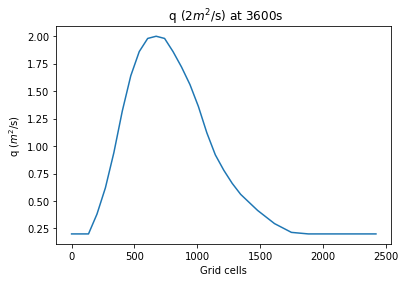

In [22]:
#Flow Hydrograph before interpolation
plt.plot(hydrograph['Time (t. s)'], hydrograph['q 2m3/s'])
plt.title(' q (2$m^2$/s) at 3600s')
plt.xlabel('Grid cells')
plt.ylabel('q ($m^2$/s)')
plt.show()

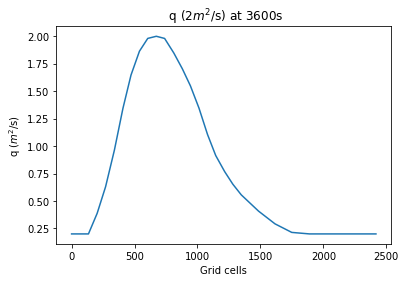

In [23]:
#Flow Hydrograph after interpolation
plt.plot(new_hydrograph['Time (t. s)'], new_hydrograph['q 2m3/s'])
plt.title(' q (2$m^2$/s) at 3600s')
plt.xlabel('Grid cells')
plt.ylabel('q ($m^2$/s)')
plt.show()

#### Saving File to Excel

In [24]:
######## Check the data path ######## 
new_hydrograph.to_excel('/Users/ragini/Desktop/test_hydrograph.xlsx',sheet_name='Hydrographs', index=False)  